In [1]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#Check for null values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

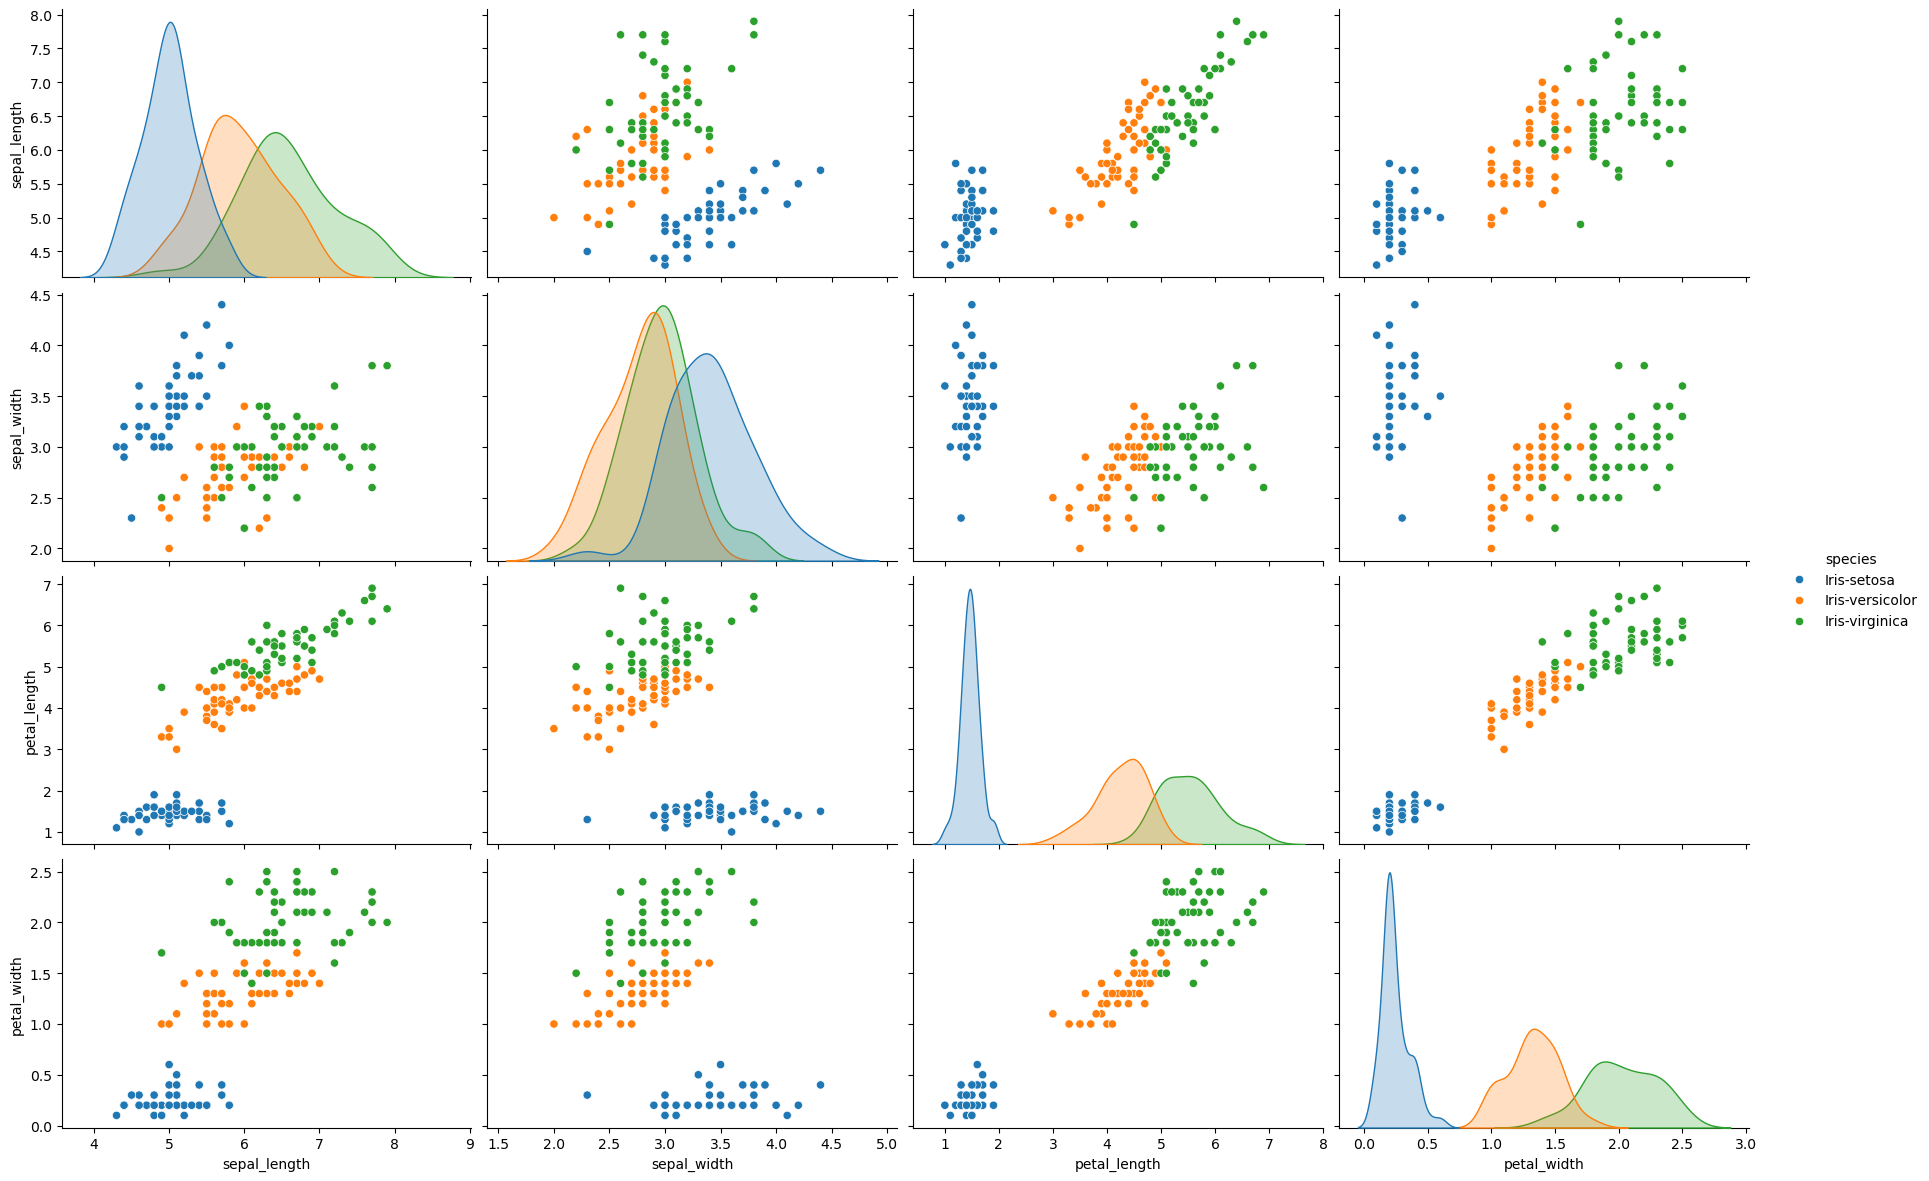

In [7]:
import seaborn as sns
sns.pairplot(df, hue = "species", height = 3, aspect = 1.5)


In [8]:
#Encode the target column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["species"] = le.fit_transform(df["species"])

In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

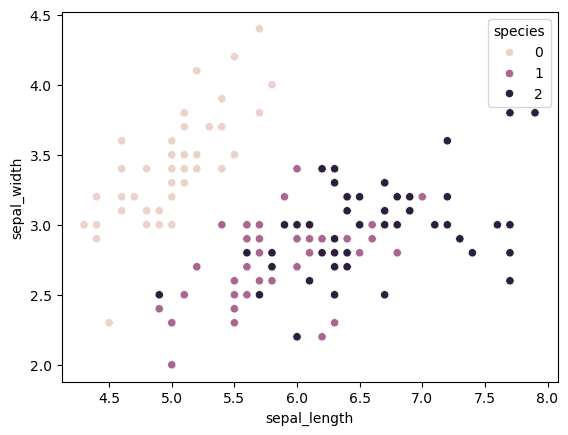

In [11]:
sns.scatterplot(data = df, x = "sepal_length", y = "sepal_width", hue = "species")

<Axes: xlabel='petal_length', ylabel='petal_width'>

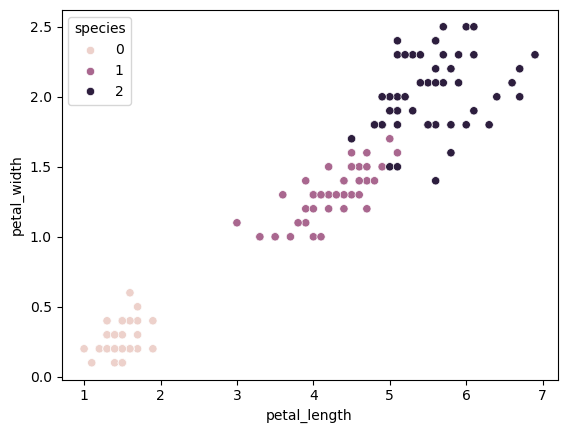

In [12]:
sns.scatterplot(data = df, x = "petal_length", y = "petal_width", hue = "species")

### Using the petal length and petal width, we can clearly classify the 3 flower types easily so we will only be needing these 2 columns

## Preparing the data

In [13]:
from sklearn.model_selection import train_test_split
X = df[["petal_length", "petal_width"]]
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [15]:
#Import the model
from sklearn.linear_model import LogisticRegression

#instantiate the model
logistic_model = LogisticRegression()

#Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions
y_preds = logistic_model.predict(X_test)

## Evaluate the model

Accuracy Score: 100.00 %


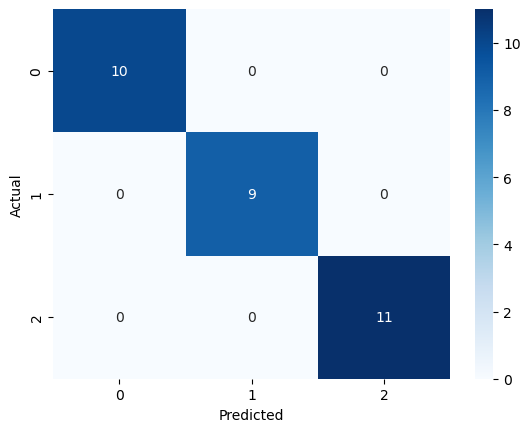

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score = logistic_model.score(X_test, y_test)
print(f"Accuracy Score: {accuracy_score*100:.2f} %")

#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Print the classification report
print(classification_report(y_test, y_preds, target_names=le.classes_))

## Our model accuracy is 100% so we will use cross validation to check our model's accuracy 

In [20]:
from sklearn.model_selection import cross_val_score

#Perform 5-fold cross validation
cross_val = cross_val_score(logistic_model,X,y, cv = 5)

print(f"Cross validation accuracy scores : {cross_val}")
print(f"Mean cross validation accuracy scores : {cross_val.mean() * 100:.2f}%")

Cross validation accuracy scores : [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean cross validation accuracy scores : 96.00%
